In [1]:
## Observations

# Hate Crimes rise during the summer times and lower towards the end of the year
# Hate Crimes occur in May more than any other month of the year.
# Hate Crimes are significantly lower during the holiday season (Nov - Feb)

# Hate Crimes saw an overall decrease across all months after 2007-2008
# Hate Crimes saw their most significant monthly spike from Oct - Nov 2016

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = "../input_files/hate_crime_v3.csv"

m_df = pd.read_csv(file, low_memory = False)
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194194 entries, 0 to 194193
Data columns (total 30 columns):
INCIDENT_ID                 194194 non-null int64
DATA_YEAR                   194194 non-null int64
DATA_MONTH                  194194 non-null object
ORI                         194194 non-null object
PUB_AGENCY_NAME             194194 non-null object
PUB_AGENCY_UNIT             5219 non-null object
AGENCY_TYPE_NAME            194194 non-null object
STATE_ABBR                  194194 non-null object
STATE_NAME                  194194 non-null object
DIVISION_NAME               194194 non-null object
REGION_NAME                 194194 non-null object
POPULATION_GROUP_CODE       194194 non-null object
POPULATION_GROUP_DESC       194194 non-null object
INCIDENT_DATE               194194 non-null object
ADULT_VICTIM_COUNT          29915 non-null float64
JUVENILE_VICTIM_COUNT       29813 non-null float64
TOTAL_OFFENDER_COUNT        194194 non-null int64
ADULT_OFFENDER_COUNT       

In [3]:
m_df = m_df.loc[m_df['DATA_YEAR']>=2007, :]
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72894 entries, 121300 to 194193
Data columns (total 30 columns):
INCIDENT_ID                 72894 non-null int64
DATA_YEAR                   72894 non-null int64
DATA_MONTH                  72894 non-null object
ORI                         72894 non-null object
PUB_AGENCY_NAME             72894 non-null object
PUB_AGENCY_UNIT             1897 non-null object
AGENCY_TYPE_NAME            72894 non-null object
STATE_ABBR                  72894 non-null object
STATE_NAME                  72894 non-null object
DIVISION_NAME               72894 non-null object
REGION_NAME                 72894 non-null object
POPULATION_GROUP_CODE       72894 non-null object
POPULATION_GROUP_DESC       72894 non-null object
INCIDENT_DATE               72894 non-null object
ADULT_VICTIM_COUNT          29915 non-null float64
JUVENILE_VICTIM_COUNT       29813 non-null float64
TOTAL_OFFENDER_COUNT        72894 non-null int64
ADULT_OFFENDER_COUNT        28704 non

In [4]:
m_df.head()

,INCIDENT_ID,DATA_YEAR,DATA_MONTH,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,...,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,BIAS_TYPE,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
121300,125705,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Other/Unknown,Anti-Disability,Anti-Mental Disability,Individual,S,S
121301,125706,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Parking/Drop Lot/Garage,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S
121302,125707,2007,March,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121303,125708,2007,April,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Simple Assault,2.0,Hotel/Motel/Etc.,Anti-Sexual Orientation,Anti-Gay (Male),Individual,S,S
121304,125709,2007,May,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,...,NaN,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Race/Ethnicity,Anti-Black or African American,Individual,S,S


In [5]:
m_df['INCIDENT_DATE'] = pd.to_datetime(m_df['INCIDENT_DATE'])
m_df['INCIDENT_DATE'] = pd.DatetimeIndex(m_df['INCIDENT_DATE']).month
months = m_df['INCIDENT_DATE'].unique()

In [6]:
months

array([ 3,  4,  5,  6,  8,  9, 10, 12, 11,  7,  2,  1], dtype=int64)

In [7]:
months.sort(kind='quicksort')
months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [8]:
month_count = m_df["INCIDENT_DATE"].value_counts()
months_df = pd.DataFrame({"Total": month_count})
months_df = months_df.sort_index()
months_df

,Total
1,5157
2,5072
3,6097
4,6297
5,6722
6,6468
7,6620
8,6636
9,6550
10,6617


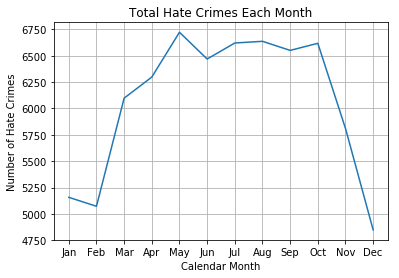

In [9]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, months_df.Total)
plt.title("Total Hate Crimes Each Month")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.xticks(months, labels=xticks)
plt.grid()

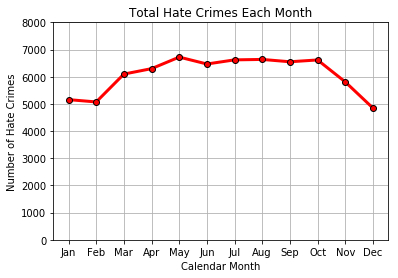

In [58]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, months_df.Total, color='red', linewidth=3, marker='o', markeredgecolor='black')
plt.title("Total Hate Crimes Each Month")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.xticks(months, labels=xticks)
plt.grid()
plt.ylim(0,8000)
plt.savefig('Images/4. Hate_Crimes_by_Month.png')

In [11]:
year_one = m_df.loc[m_df["DATA_YEAR"] == 2007]
year_one_count = year_one["INCIDENT_DATE"].value_counts()

year_two = m_df.loc[m_df["DATA_YEAR"] == 2008]
year_two_count = year_two["INCIDENT_DATE"].value_counts()

year_three = m_df.loc[m_df["DATA_YEAR"] == 2009]
year_three_count = year_three["INCIDENT_DATE"].value_counts()

year_four = m_df.loc[m_df["DATA_YEAR"] == 2010]
year_four_count = year_four["INCIDENT_DATE"].value_counts()

year_five = m_df.loc[m_df["DATA_YEAR"] == 2011]
year_five_count = year_five["INCIDENT_DATE"].value_counts()

year_six = m_df.loc[m_df["DATA_YEAR"] == 2012]
year_six_count = year_six["INCIDENT_DATE"].value_counts()

year_seven = m_df.loc[m_df["DATA_YEAR"] == 2013]
year_seven_count = year_seven["INCIDENT_DATE"].value_counts()

year_eight = m_df.loc[m_df["DATA_YEAR"] == 2014]
year_eight_count = year_eight["INCIDENT_DATE"].value_counts()

year_nine = m_df.loc[m_df["DATA_YEAR"] == 2015]
year_nine_count = year_nine["INCIDENT_DATE"].value_counts()

year_ten = m_df.loc[m_df["DATA_YEAR"] == 2016]
year_ten_count = year_ten["INCIDENT_DATE"].value_counts()

year_eleven = m_df.loc[m_df["DATA_YEAR"] == 2017]
year_eleven_count = year_eleven["INCIDENT_DATE"].value_counts()

In [15]:
m_summary_df = pd.DataFrame({"2007": year_one_count,
                          "2008": year_two_count,
                          "2009": year_three_count,
                          "2010": year_four_count,
                          "2011": year_five_count,
                          "2012": year_six_count,
                          "2013": year_seven_count,
                          "2014": year_eight_count,
                          "2015": year_nine_count,
                          "2016": year_ten_count,
                          "2017": year_eleven_count})
m_summary_df = m_summary_df.sort_index()
m_summary_df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,550,577,478,474,438,560,404,327,410,382,557
2,482,614,491,437,386,544,400,389,364,384,581
3,630,693,565,600,518,589,483,441,436,495,647
4,678,698,549,663,544,577,529,489,512,489,569
5,718,745,615,613,593,629,569,520,561,492,667
6,683,689,591,538,557,571,574,511,562,539,653
7,686,714,557,558,560,611,604,513,593,613,611
8,657,693,639,619,576,568,584,562,542,521,675
9,748,708,594,657,555,590,518,508,485,535,652
10,740,737,628,634,588,518,526,559,473,564,650


Text(0.5, 0, 'Calendar Month')

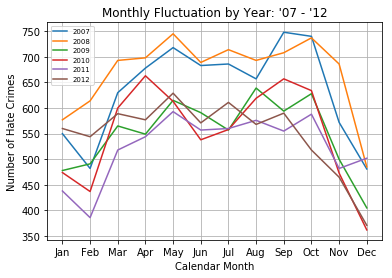

In [16]:
xticks = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(months, m_summary_df["2007"])
plt.plot(months, m_summary_df["2008"])
plt.plot(months, m_summary_df["2009"])
plt.plot(months, m_summary_df["2010"])
plt.plot(months, m_summary_df["2011"])
plt.plot(months, m_summary_df["2012"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="x-small", loc=2)
plt.title("Monthly Fluctuation by Year: '07 - '12")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")

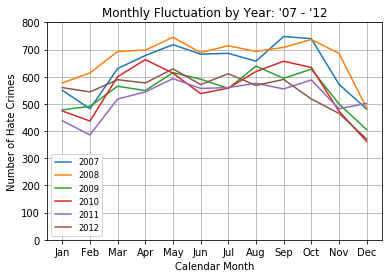

In [17]:
plt.plot(months, m_summary_df["2007"])
plt.plot(months, m_summary_df["2008"])
plt.plot(months, m_summary_df["2009"])
plt.plot(months, m_summary_df["2010"])
plt.plot(months, m_summary_df["2011"])
plt.plot(months, m_summary_df["2012"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="small", loc=0)
plt.ylim(0,800)
plt.title("Monthly Fluctuation by Year: '07 - '12")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.savefig('Images/4. Month_and_Year_Breakdown_07_to_12.png')

Text(0.5, 0, 'Calendar Month')

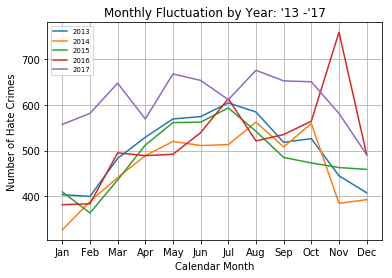

In [18]:
plt.plot(months, m_summary_df["2013"])
plt.plot(months, m_summary_df["2014"])
plt.plot(months, m_summary_df["2015"])
plt.plot(months, m_summary_df["2016"])
plt.plot(months, m_summary_df["2017"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="x-small", loc=2)
plt.title("Monthly Fluctuation by Year: '13 -'17")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")

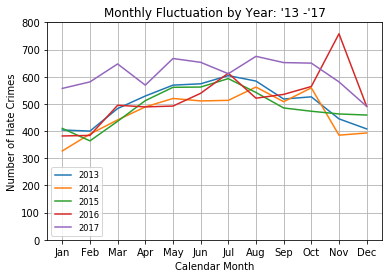

In [19]:
plt.plot(months, m_summary_df["2013"])
plt.plot(months, m_summary_df["2014"])
plt.plot(months, m_summary_df["2015"])
plt.plot(months, m_summary_df["2016"])
plt.plot(months, m_summary_df["2017"])
plt.xticks(months, labels=xticks, rotation="horizontal")
plt.grid()
plt.legend(fontsize="small", loc=0)
plt.ylim(0,800)
plt.title("Monthly Fluctuation by Year: '13 -'17")
plt.ylabel("Number of Hate Crimes")
plt.xlabel("Calendar Month")
plt.savefig('Images/4. Month_and_Year_Breakdown_13_to_17.png')

In [20]:
disable = m_df.loc[m_df["BIAS_DESC"] == "Anti-Disability"]
disable_count = disable["DATA_YEAR"].value_counts()
disable_percent = (disable["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

gender = m_df.loc[m_df["BIAS_DESC"] == "Anti-Gender"]
gender_count = gender["DATA_YEAR"].value_counts()
gender_percent = (gender["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

race = m_df.loc[m_df["BIAS_DESC"] == "Anti-Race/Ethnicity"]
race_count = race["DATA_YEAR"].value_counts()
race_percent = (race["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

religion = m_df.loc[m_df["BIAS_DESC"] == "Anti-Religion"]
religion_count = religion["DATA_YEAR"].value_counts()
religion_percent = (religion["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100

sex = m_df.loc[m_df["BIAS_DESC"] == "Anti-Sexual Orientation"]
sex_count = sex["DATA_YEAR"].value_counts()
sex_percent = (sex["DATA_YEAR"].value_counts()/m_df["DATA_YEAR"].value_counts())*100


In [25]:
years = m_df["DATA_YEAR"].unique()
years_count =m_df["DATA_YEAR"].value_counts()
years_count

2008    8039
2007    7625
2017    7334
2010    6628
2009    6612
2012    6593
2011    6299
2016    6263
2013    6044
2015    5860
2014    5597
Name: DATA_YEAR, dtype: int64

In [22]:
bias_df = pd.DataFrame({"Year": years,
                        "Anti-Disability": disable_count,
                       "Anti-Gender": gender_count,
                       "Anti-Race/Ethnicity": race_count,
                       "Anti-Religion": religion_count,
                       "Anti-Sexual Orientation": sex_count})
bias_df

,Year,Anti-Disability,Anti-Gender,Anti-Race/Ethnicity,Anti-Religion,Anti-Sexual Orientation
2007,2007,59,NaN,4892,1397,1277
2008,2008,93,NaN,5057,1552,1337
2009,2009,94,NaN,3992,1298,1228
2010,2010,43,NaN,3985,1322,1278
2011,2011,64,NaN,3688,1237,1310
2012,2012,110,6.0,3858,1319,1300
2013,2013,93,28.0,3584,1048,1291
2014,2014,96,74.0,3293,1031,1103
2015,2015,75,65.0,3330,1249,1141
2016,2016,101,49.0,3585,1304,1224


In [26]:
m_year_df = pd.DataFrame({"Total": years_count})
m_year_df = m_year_df.sort_index()
m_year_df

,Total
2007,7625
2008,8039
2009,6612
2010,6628
2011,6299
2012,6593
2013,6044
2014,5597
2015,5860
2016,6263


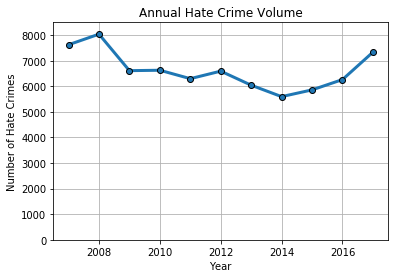

In [60]:
plt.plot(years, m_year_df.Total, linewidth=3, marker='o', markeredgecolor='black')
plt.grid()
plt.title("Annual Hate Crime Volume")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.ylim(0,8500)
plt.savefig("Images/Annual_Hate_Crime_Volume.png")

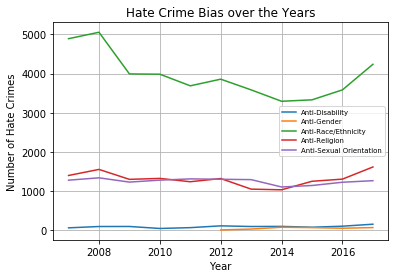

In [47]:
plt.plot(years, bias_df["Anti-Disability"])
plt.plot(years, bias_df["Anti-Gender"])
plt.plot(years, bias_df["Anti-Race/Ethnicity"])
plt.plot(years, bias_df["Anti-Religion"])
plt.plot(years, bias_df["Anti-Sexual Orientation"])
plt.grid()
plt.legend(fontsize="x-small", loc=0)
plt.title("Hate Crime Bias over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
plt.savefig("Images/Hate_Crime_Bias_Over_Year.png")

Text(0, 0.5, 'Number of Hate Crimes')

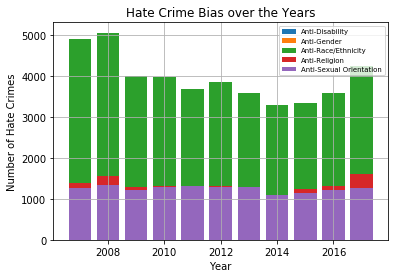

In [76]:
labels = ["Anti-Disability", "Anti-Gender", "Anti-Race/Ethnicity", "Anti-Religion", "Anti-Sexual Orientation"]

plt.bar(years, bias_df["Anti-Disability"])
plt.bar(years, bias_df["Anti-Gender"])
plt.bar(years, bias_df["Anti-Race/Ethnicity"])
plt.bar(years, bias_df["Anti-Religion"])
plt.bar(years, bias_df["Anti-Sexual Orientation"])
plt.grid()
plt.legend(fontsize="x-small", loc=0, labels=labels)
plt.title("Hate Crime Bias over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")

Text(0, 0.5, 'Number of Hate Crimes')

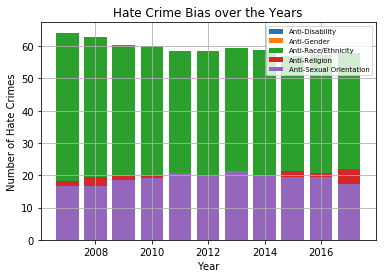

In [94]:
labels = ["Anti-Disability", "Anti-Gender", "Anti-Race/Ethnicity", "Anti-Religion", "Anti-Sexual Orientation"]

plt.bar(years, bias_percent_df["Anti-Disability"])
plt.bar(years, bias_percent_df["Anti-Gender"])
plt.bar(years, bias_percent_df["Anti-Race/Ethnicity"])
plt.bar(years, bias_percent_df["Anti-Religion"])
plt.bar(years, bias_percent_df["Anti-Sexual Orientation"])
plt.grid()
plt.legend(fontsize="x-small", loc=0, labels=labels)
plt.title("Hate Crime Bias over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Hate Crimes")
